# Generating Portrait Plots<a =id"top"></a>

# Table of Content

- [Preparing The notebook](#prep)
- [Loading Data Using the JSons class](#load)
- [Plotting With A Portrait Plot](#basic)
- [Customizing The Portrait Plot](#custom)
- [Plotting Multiple Sources](#multiple)
- [Clickable Portrait Plots](#click)

# Preparing The notebook<a id="prep"></A>

In [1]:
import tempfile
import base64
class VCSAddonsNotebook(object):
    def __init__(self,x):
        self.x = x
    def _repr_png_(self):
        fnm = tempfile.mktemp()+".png"
        self.x.png(fnm)
        encoded = base64.b64encode(open(fnm, "rb").read())
        return encoded
    def __call__(self):
        return self
    
# VCS Canvas
import vcs
x=vcs.init(bg=True,geometry=(400,400))
show = VCSAddonsNotebook(x)
# Load our "pretty" colormap
x.scriptrun(
    os.path.join(
        sys.prefix,
        "share",
        "pmp",
        "graphics",
        'vcs',
        'portraits.scr'))
x.setcolormap("bl_rd_12")

# Loading Data Using The Json Class<a id="load"></A>

We will be using test data, with path relative to the directory of this Notebook

For more on Json Class see [this Notebook](JsonClass.ipynb)

In [2]:
import glob
import json
import os
import pcmdi_metrics

json_files = glob.glob(
    os.path.join(
    os.getcwd(),
    "..",
    "..",
    "tests",
    "graphics",
    "json",
    "v2.0",
    "*.json"))

json_files += glob.glob(
    os.path.join(
    os.getcwd(),
    "..",
    "..",
    "tests",
    "graphics",
    "json",
    "v1.0",
     "*.json"))

print "We are looking at {:d} Json Files:".format(len(json_files))
J = pcmdi_metrics.pcmdi.io.JSONs(json_files)

models = sorted(J.getAxis("model")[:])
variables = sorted(J.getAxis("variable")[:])
print "We read in {:d} models: {}:".format(len(models),models)
print "We read in {:d} variables: {}:".format(len(variables),variables)

# reads in rms_xy for all season, global region
rms_xy = J(statistic=["rms_xy"],region="global")(squeeze=1)
median = genutil.statistics.median(rms_xy,axis=1)[0]

#match  shapes
rms_xy, median = genutil.grower(rms_xy,median)

#Loose info on median
median = median.filled()
# normalize
rms_xy = (rms_xy-median) / median

We are looking at 28 Json Files:
We read in 17 models: [u'0071-0100', u'ACCESS1-0', u'ACCESS1-3', u'CCSM4', u'CESM1-BGC', u'CESM1-CAM5', u'CESM1-FASTCHEM', u'CESM1-WACCM', u'CSIRO-Mk3-6-0', u'FGOALS-g2', u'GFDL-CM3', u'GFDL-ESM2G', u'GFDL-ESM2M', u'HadGEM2-AO', u'MIROC4h', u'bcc-csm1-1', u'bcc-csm1-1-m']:
We read in 14 variables: [u'pr', u'prw', u'psl', u'rltcre', u'rlut', u'rstcre', u'ta-200', u'ta-850', u'tas', u'ua-200', u'ua-850', u'va-200', u'va-850', u'zg-500']:


/home/doutriaux1/anaconda2/envs/dev-nox/lib/python2.7/site-packages/genutil/statistics.py:1709: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if numpy.rank(ii)>0:


# Plotting A Portrait Plot<a id="basic"></a>

/home/doutriaux1/anaconda2/envs/dev-nox/lib/python2.7/site-packages/vcs/VTKPlots.py:1000: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  data[:] = numpy.ma.masked_invalid(data, numpy.nan)


NPARAM: 3


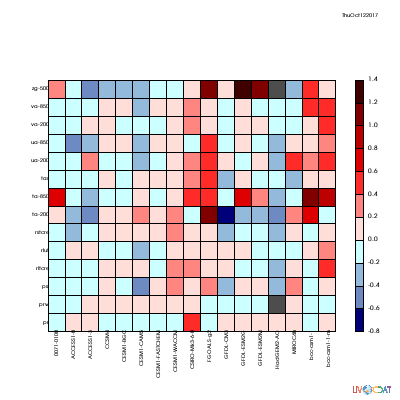

In [3]:
import pcmdi_metrics.graphics.portraits
P = pcmdi_metrics.graphics.portraits.Portrait()
#P.PLOT_SETTINGS.colorm
yax = [s.encode('utf-8') for s in models]  # CHANGE FROM UNICODE TO BYTE STRINGS

# Preprocessing step to "decorate" the axis
P.decorate(rms_xy, variables, yax)

# Plot ANNUL
P.plot(rms_xy[...,0],x=x)
show()

# Customizing The Portrait Plot<a id="custom"></a>

Most of the setting to customize the portrait plot are contained in 
P.PLOT_SETTINGS

NPARAM: 3


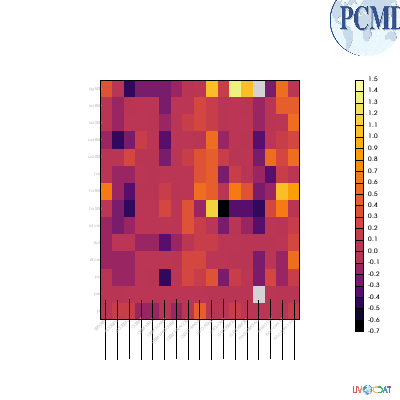

In [4]:
SET = P.PLOT_SETTINGS
# Viewport on the Canvas
SET.x1 = .25
SET.x2 = .75
SET.y1 = .2
SET.y2 = .8

# Both X (horizontal) and y (VERTICAL) ticks
# Text table
SET.tictable = vcs.createtexttable()
SET.tictable.color="grey"

# X (bottom) ticks
# Text Orientation
SET.xticorientation = vcs.createtextorientation()
SET.xticorientation.angle = -45
SET.xticorientation.halign="right"
SET.xticorientation.height = 8
# Y (vertical) ticks
SET.yticorientation = vcs.createtextorientation()
SET.yticorientation.angle = 0
SET.yticorientation.halign="right"
SET.yticorientation.height = 8

# Parameters
SET.parameterorientation = vcs.createtextorientation()
SET.parameterorientation.height = 60
SET.parametertable = vcs.createtexttable()
SET.parametertable.color = "blue"

# We can turn off the "grid"
SET.draw_mesh = "n"

# Control color for missing
SET.missing_color = "light grey"

# Tics length
SET.xtic1.y1 = .25
SET.xtic1.y2 = .1

# Logo can be a string or an image
SET.logo = P.PLOT_SETTINGS.logo = os.path.join(sys.prefix,"share","pmp","graphics","png","160915_PCMDI_logo_348x300px.png")
SET.logo.x = .93
SET.logo.y = .95
SET.logo.width = 85

# Timestamp
SET.time_stamp = vcs.createtext()
SET.time_stamp.color = "blue"
SET.time_stamp.y = [.9]
SET.time_stamp.x = [.98]
SET.time_stamp.halign="right"
# or we can turn it off
SET.time_stamp = None

# Colormap
SET.colormap = "inferno"

# level to use
SET.levels = [-.7,-.6,-.5,-.4,-.3,-.2,-.1,0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.,1.1,1.2,1.3,1.4,1.5]
# colors to use
SET.fillareacolors = vcs.getcolors(SET.levels)
x.clear()
P.plot(rms_xy[...,0],x=x)
show()

# Plotting Multiple Sources<a id="multiple"></a>

We may want to show 2 seasons at once

NPARAM: 3


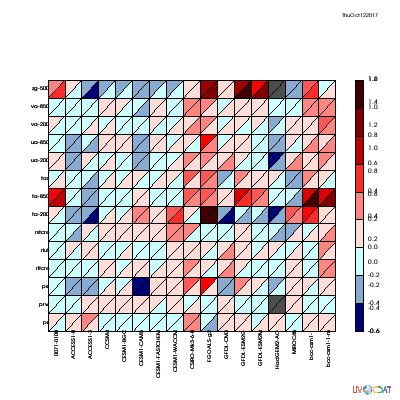

In [6]:
# Start fresh
P = pcmdi_metrics.graphics.portraits.Portrait()
P.decorate(rms_xy, variables, yax)
x.clear()
# DJF and JJA
# DJF if first (1) out of two sources (2)
P.plot(rms_xy[...,1],x=x,multiple=1.2)
# JJA is second (2) out of two sources (2)
P.plot(rms_xy[...,3],x=x,multiple=2.2)
show()

or all four seasons

NPARAM: 3


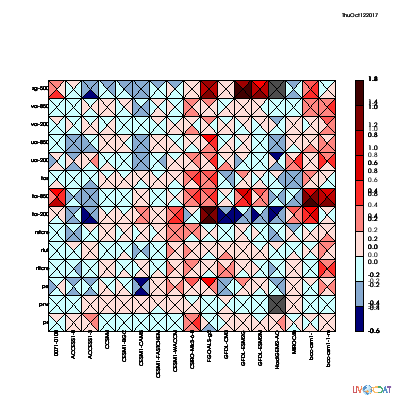

In [7]:

# All for season
for i in range(4):
    multi=i+1.4
    P.plot(rms_xy[...,i+1],x=x,multiple=multi)
show()

# Clickable Portrait Plot<a id="custom"></a>